# Generative Models

In [1]:
# load necessary packages

import numpy as np
from numpy.random import multivariate_normal
from random import random
import matplotlib.pyplot as plt

## 1. Data Generation

In [2]:
# Parameters
mu_1, mu_2 = [1.5,0], [-1.5,0] # mu_{+}, mu_{-}
sigma_1 = [[0.1,0],[0,10]] # Sigma_{+}
sigma_2 = sigma_1
p_y_p = 0.5 # p(y=+1)
N = 1000


def data_generation_process():
    X, Y, C = np.zeros((N,2)), [], []
    # 
    for idx in range(N):
        r = random()
        if r < p_y_p:
            sample = multivariate_normal(mu_1, sigma_1, 1)
        else:
            sample = multivariate_normal(mu_2, sigma_2, 1)
        X[idx,:] = sample
    return X

In [3]:
# Data generation

X = data_generation_process()

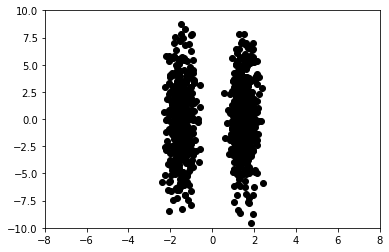

In [4]:
# Visualize the data

plt.scatter(X[:,0], X[:,1], c="black")
plt.xlim((-8,8))
plt.ylim((-10,10))
plt.show()

## 2. Comparison

In [5]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

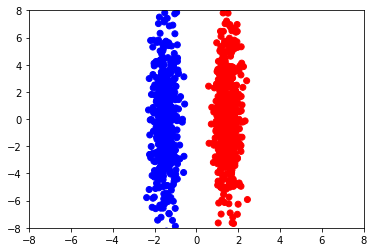

In [6]:
res = KMeans(n_clusters=2).fit(X)
# res = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
labels = res.labels_ # cluster label/index

clist = []
for idx in list(labels):
    if idx == 0:
        clist.append("red")
    else:
        clist.append("blue")
        
# visualize clustering results
plt.scatter(X[:,0], X[:,1], c=clist)
plt.xlim((-8,8))
plt.ylim((-8,8))
plt.show()

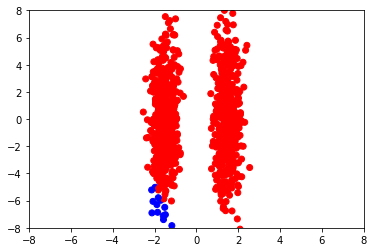

In [109]:
gmm = GaussianMixture(n_components=2, init_params='random', covariance_type='tied').fit(X)
# probs = gmm.predict_proba(X)
# clist = list(probs[:,0])
gmm_labels = gmm.predict(X)

clist = []
for idx in list(gmm_labels):
    if idx == 0:
        clist.append("red")
    else:
        clist.append("blue")

plt.scatter(X[:,0], X[:,1], c=clist)
plt.xlim((-8,8))
plt.ylim((-8,8))
plt.show()

In [80]:
gmm.means_

array([[-0.0304895 , -0.13216384],
       [ 0.00640377, -0.01577883]])